In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
# Checking duplicates
df.duplicated().any()

np.False_

In [46]:
# Checking Column details
for col in df.columns:
  print('Column: ', col)
  print('No. of Unique values: ',df[col].nunique())
  print('Unique Values: ',df[col].unique())

Column:  customerID
No. of Unique values:  7043
Unique Values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column:  gender
No. of Unique values:  2
Unique Values:  ['Female' 'Male']
Column:  SeniorCitizen
No. of Unique values:  2
Unique Values:  [0 1]
Column:  Partner
No. of Unique values:  2
Unique Values:  ['Yes' 'No']
Column:  Dependents
No. of Unique values:  2
Unique Values:  ['No' 'Yes']
Column:  tenure
No. of Unique values:  73
Unique Values:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column:  PhoneService
No. of Unique values:  2
Unique Values:  ['No' 'Yes']
Column:  MultipleLines
No. of Unique values:  3
Unique Values:  ['No phone service' 'No' 'Yes']
Column:  InternetService
No. of Unique values:  3
Unique Values:  ['DSL' 'Fiber optic' 'No']
Column:  Onlin

In [47]:
# Changing data type of Total Charges from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [48]:
# Handling missing values
## Filling null values in Total Charges with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Univariate Analysis

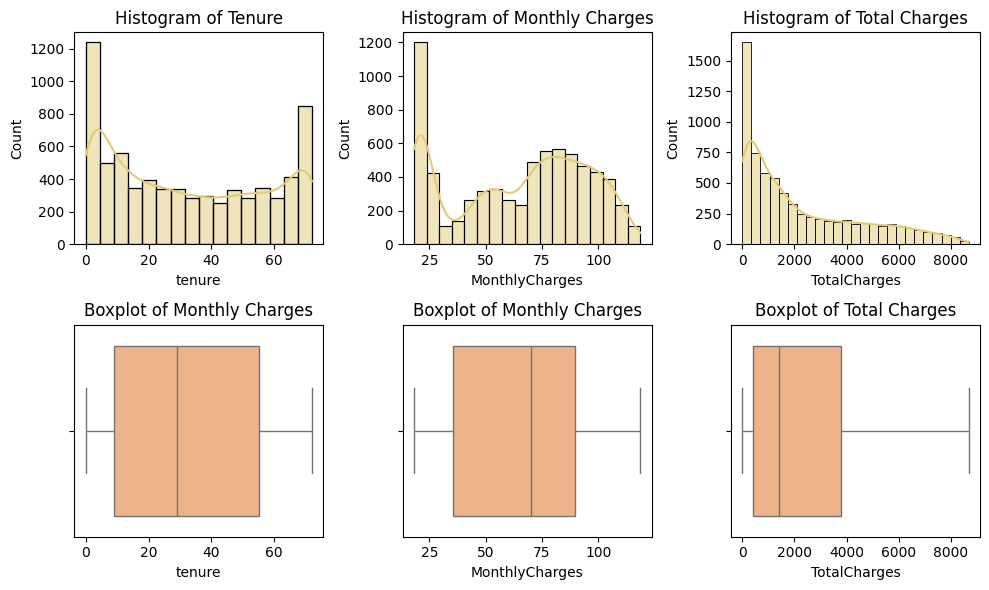

In [49]:
# Creating Histogram and Boxplots
fig, ax = plt.subplots(2, 3, figsize = (10, 6))

# Plotting Histogram
sns.histplot(data=df, x = 'tenure', kde=True, ax=ax[0,0], color='#e2ca76')
ax[0,0].set_title('Histogram of Tenure')

sns.histplot(data=df, x = 'MonthlyCharges', kde=True, ax=ax[0,1], color='#e2ca76')
ax[0,1].set_title('Histogram of Monthly Charges')

sns.histplot(data=df, x = 'TotalCharges', kde=True, ax=ax[0,2], color='#e2ca76')
ax[0,2].set_title('Histogram of Total Charges')

# Plotting Boxplot
sns.boxplot(data=df, x = 'tenure', ax=ax[1,0], color='#ffb07c')
ax[1,0].set_title('Boxplot of Monthly Charges')

sns.boxplot(data=df, x = 'MonthlyCharges', ax=ax[1,1], color='#ffb07c')
ax[1,1].set_title('Boxplot of Monthly Charges')

sns.boxplot(data=df, x = 'TotalCharges', ax=ax[1,2], color='#ffb07c')
ax[1,2].set_title('Boxplot of Total Charges')

plt.tight_layout()
plt.show()

# Insight
- There are no outliers in the univariate dataset.
- The dataset of Monthly Charges and Total Charges is skewed but that will not impact the analysis.

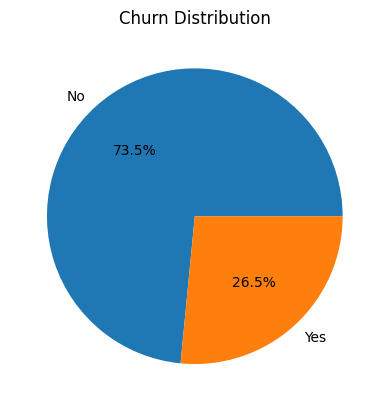

In [50]:
# Visualizing Churn count
churn_counts = df['Churn'].value_counts()

plt.pie(churn_counts, autopct='%1.1f%%', labels=churn_counts.index)
plt.title('Churn Distribution')
plt.show()

# Data Distribution

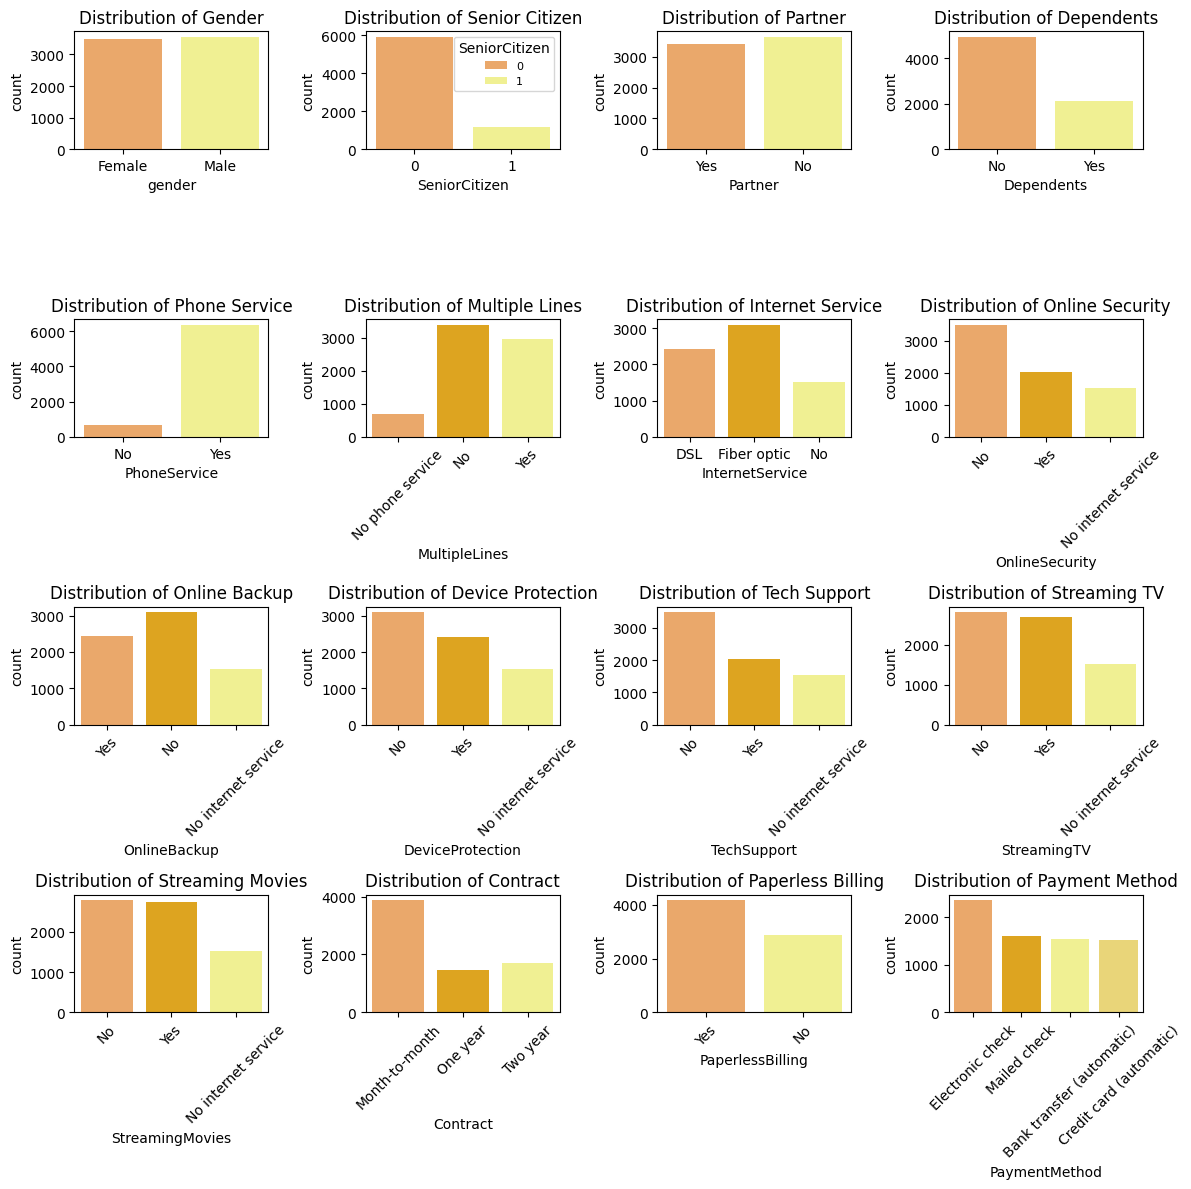

In [51]:
fig, ax = plt.subplots(4,4, figsize = (12,12))
ax = ax.flatten()

sns.countplot(x=df['gender'], ax=ax[0], hue = df['gender'], palette=['#ffa756', '#ffff84'])
ax[0].set_title('Distribution of Gender')

sns.countplot(x=df['SeniorCitizen'], ax=ax[1], hue=df['SeniorCitizen'], palette=['#ffa756', '#ffff84'])
ax[1].set_title('Distribution of Senior Citizen')
ax[1].legend(title='SeniorCitizen', prop={'size': 8}, loc='upper right', borderaxespad=0.5)

sns.countplot(x=df['Partner'], ax=ax[2], hue=df['Partner'], palette=['#ffa756', '#ffff84'])
ax[2].set_title('Distribution of Partner')

sns.countplot(x=df['Dependents'], ax=ax[3], hue = df['Dependents'], palette=['#ffa756', '#ffff84'])
ax[3].set_title('Distribution of Dependents')

sns.countplot(x=df['PhoneService'], ax=ax[4], hue= df['PhoneService'], palette=['#ffa756', '#ffff84'])
ax[4].set_title('Distribution of Phone Service')

sns.countplot(x=df['MultipleLines'], ax=ax[5], hue = df['MultipleLines'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[5].set_title('Distribution of Multiple Lines')
ax[5].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['InternetService'], ax=ax[6], hue = df['InternetService'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[6].set_title('Distribution of Internet Service')

sns.countplot(x=df['OnlineSecurity'], ax=ax[7], hue = df['OnlineSecurity'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[7].set_title('Distribution of Online Security')
ax[7].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['OnlineBackup'], ax=ax[8], hue = df['OnlineBackup'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[8].set_title('Distribution of Online Backup')
ax[8].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['DeviceProtection'], ax=ax[9], hue = df['DeviceProtection'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[9].set_title('Distribution of Device Protection')
ax[9].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['TechSupport'], ax=ax[10], hue = df['TechSupport'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[10].set_title('Distribution of Tech Support')
ax[10].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['StreamingTV'], ax=ax[11], hue = df['StreamingTV'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[11].set_title('Distribution of Streaming TV')
ax[11].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['StreamingMovies'], ax=ax[12], hue = df['StreamingMovies'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[12].set_title('Distribution of Streaming Movies')
ax[12].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['Contract'], ax=ax[13], hue = df['Contract'], palette=['#ffa756', '#fcb001', '#ffff84'])
ax[13].set_title('Distribution of Contract')
ax[13].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['PaperlessBilling'], ax=ax[14], hue = df['PaperlessBilling'], palette=['#ffa756', '#ffff84'])
ax[14].set_title('Distribution of Paperless Billing')
ax[14].tick_params(axis = 'x', rotation = 45)

sns.countplot(x=df['PaymentMethod'], ax=ax[15], hue = df['PaymentMethod'], palette=['#ffa756', '#fcb001', '#ffff84', '#fce166'])
ax[15].set_title('Distribution of Payment Method')
ax[15].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

# Insights
- **Gender** — Distribution is very balanced → gender is likely not a dominant factor in churn.
- **Senior Citizens** — Majority are not senior citizens. The senior group is smaller but still important to analyze for potentially higher churn rates.
- **Partner** — Almost half of the customers have a partner → may be associated with greater contract stability.
- **Dependents** — Most customers do not have dependents → may increase flexibility in switching services.
- **Phone Service** — Most customers subscribe to phone service, with only a small portion without it.
- **Multiple Lines** — Nearly half have only one line, while 42% have multiple lines.
- **Internet Service** — Fiber optic is most popular. This group often shows higher churn due to higher pricing.
- **Add-on Services** — Many customers do not take add-ons even if they have internet → upselling opportunity.
- **Contract Type** — Majority are on month-to-month contracts → more vulnerable to churn.
- **Paperless Billing** — Most customers use paperless billing → easier payments, but may be linked to higher churn due to ease of cancellation.
- **Payment Method** — Customers using electronic checks often show higher churn in churn analysis studies.

# Churn Analysis on Bivariate Data

In [52]:
import plotly.express as px
gender_churn_count = df.groupby(['gender', 'Churn']).size().reset_index(name = 'Count')

fig = px.bar(gender_churn_count, x = 'gender', y = 'Count', color='Churn', barmode='group', text='Count', title= 'Churn by Gender')
fig.update_traces(textposition = 'outside')
fig.show()

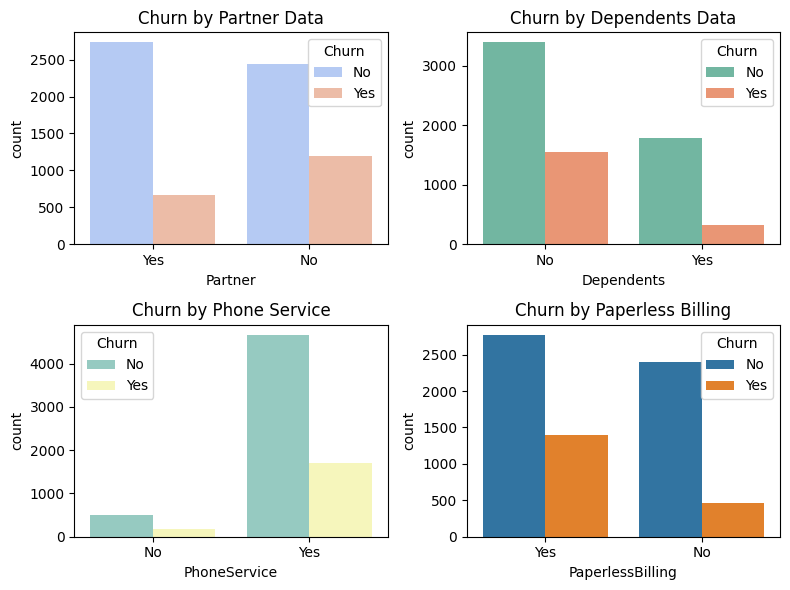

In [53]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.countplot(x = df['Partner'], hue = df['Churn'], palette='coolwarm')
plt.title('Churn by Partner Data')

plt.subplot(2,2,2)
sns.countplot(x = df['Dependents'], hue = df['Churn'], palette='Set2')
plt.title('Churn by Dependents Data')

plt.subplot(2,2,3)
sns.countplot(x = df['PhoneService'], hue = df['Churn'], palette='Set3')
plt.title('Churn by Phone Service')

plt.subplot(2,2,4)
sns.countplot(x = df['PaperlessBilling'], hue = df['Churn'])
plt.title('Churn by Paperless Billing')

plt.tight_layout()
plt.show()

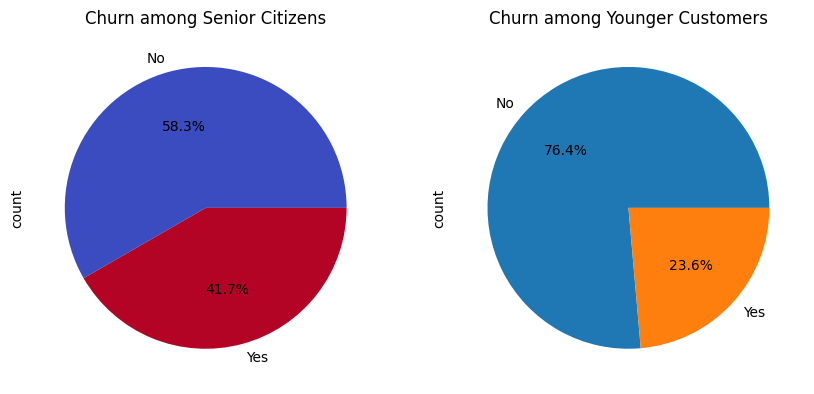

In [54]:
# Analysing Churn by Senior Citizen status
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
Churned_Senior_Citizens=df[df['SeniorCitizen']==1]['Churn'].value_counts()
Churned_Senior_Citizens.plot(kind = 'pie', autopct = '%1.1f%%', colormap='coolwarm')
plt.title('Churn among Senior Citizens')

plt.subplot(1,2,2)
Churned_Younger_Citizens=df[df['SeniorCitizen']==0]['Churn'].value_counts()
Churned_Younger_Citizens.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Churn among Younger Customers')

plt.show()

# Insight
- **Gender** → Male and female customers have almost the same churn rate → gender is not a determining factor for churn.
- **Senior Citizen** → Senior citizens are less in numbers than younger customers, however they have a higher churn rate compared to younger customers.
- **Partner & Dependents** → Customers without partners and dependents are more likely to churn → this segment is more “mobile” in switching services.
- **Phone Service** → Majority of the customers have subscribed to Phone Service → which makes Churn looks more for them but on % basis, Churn is equal at approx 25% for both with and without Phone Service customers.
- **Paperless Billing** → Customers with paperless billing have higher churn → often linked to flexible month-to-month contracts.

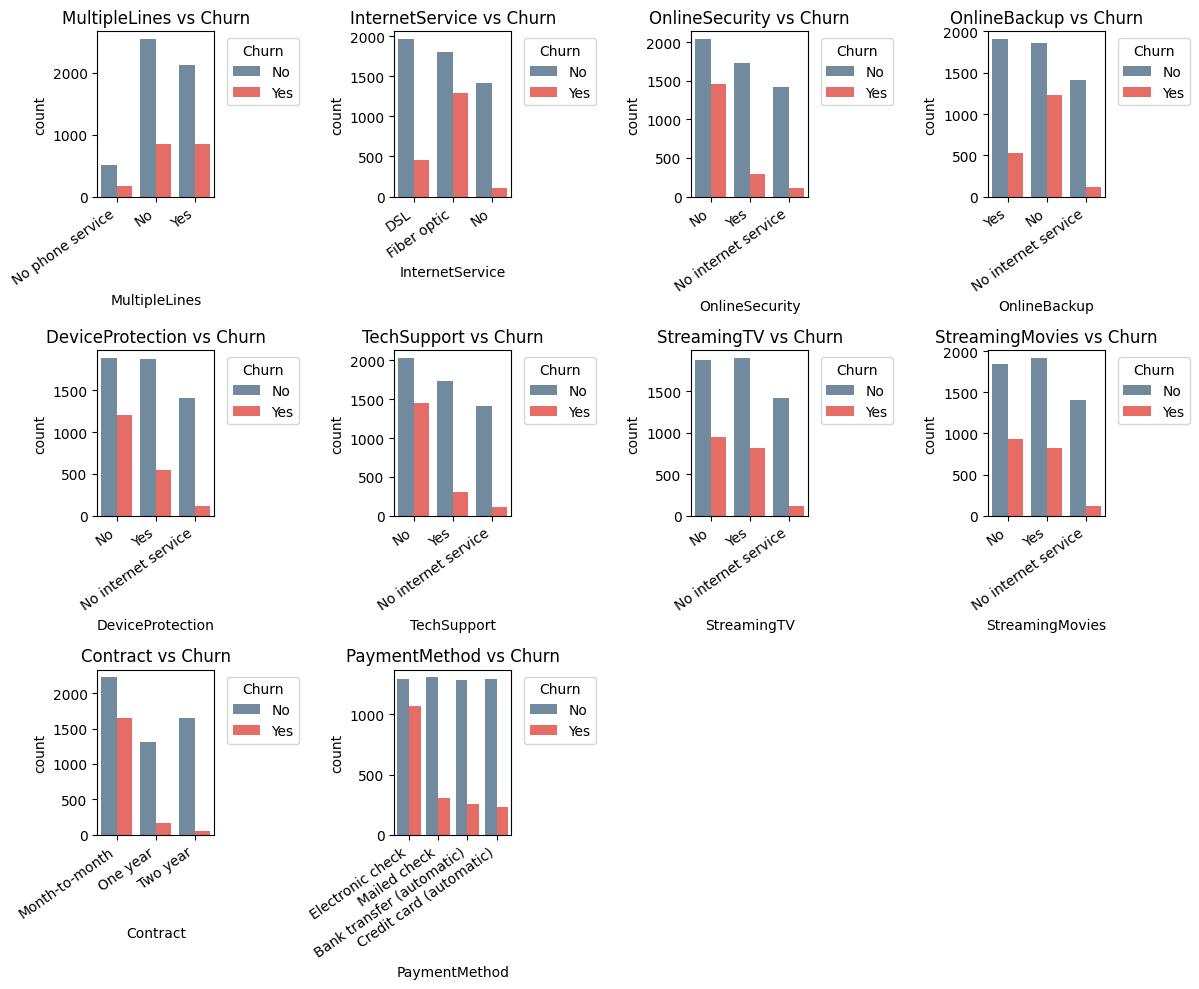

In [55]:
fig, ax = plt.subplots(3,4, figsize = (12,10))
ax = ax.flatten()
fig.delaxes(ax[10])
fig.delaxes(ax[11])

cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# loop through columns
for i, col in enumerate(cols):
    sns.countplot(x=df[col], hue=df['Churn'], ax=ax[i], palette=['#6b8ba4', '#fc5a50'])
    ax[i].set_title(f"{col} vs Churn")
    ax[i].tick_params(axis = 'x', rotation = 35)

    # ✅ fix alignment for all rotated labels
    for label in ax[i].get_xticklabels():
        label.set_horizontalalignment('right')

    # Move legend outside (to the right)
    ax[i].legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Insight
- **Internet Service** → Fiber optic has the highest churn, followed by DSL, while “No internet” has the lowest churn → likely influenced by price and performance expectations.
- **Add-on Services** → Not having additional services (Online Security, Backup, Tech Support, etc.) is associated with higher churn → presents upselling opportunities.
- **Contract** → Month-to-month contracts have a much higher churn rate than 1-year or 2-year contracts → long-term contracts effectively reduce churn.
- **Payment Method** → Customers paying by electronic check have the highest churn, whereas bank transfer, credit card, and mailed check show lower churn → electronic check is common among high-risk customers.

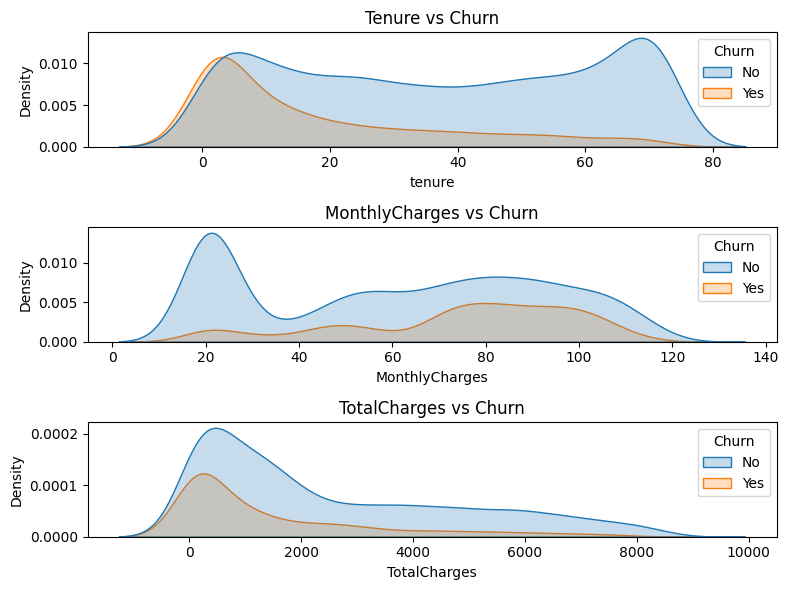

In [56]:
plt.figure(figsize=(8,6))

plt.subplot(3,1,1)
sns.kdeplot(data = df, x = 'tenure', hue = 'Churn', fill=True)
plt.title('Tenure vs Churn')

plt.subplot(3,1,2)
sns.kdeplot(data = df, x = 'MonthlyCharges', hue = 'Churn', fill=True)
plt.title('MonthlyCharges vs Churn')

plt.subplot(3,1,3)
sns.kdeplot(data = df, x = 'TotalCharges', hue = 'Churn', fill=True)
plt.title('TotalCharges vs Churn')

plt.tight_layout()
plt.show()

# Insights
- ***New customers churn more*** → Most churners have low tenure and low total charges, showing that early-stage retention is critical.
- ***High monthly charges increase churn risk*** → There's a clear churn peak in the 70 - 100 monthly charge range, suggesting possible price sensitivity.
- ***Loyal customers stay longer*** → Customers with high tenure and high total charges are far less likely to churn.
- **Retention focus areas** → Target new customers and high-bill customers with special offers, onboarding, and value-added services to reduce churn.

# Business Recommendations
- Offer discounts for customers in their first year to reduce early churn.  
- Incentivize customers to switch from monthly to yearly contracts.  
- Improve ease of payment methods beyond Electronic Check.  
- Create targeted retention campaigns for high-paying customers.

# Conclusion

This analysis identified multiple drivers of churn:
- Contract type
- Tenure
- Payment method
- Monthly charges

These insights can help the telecom company reduce churn and improve customer retention.

Next steps:
- Predict churn probability using classification models (future project).
- Deploy a dashboard for real-time churn monitoring.
